We will train the animals dataset with five classes. For this problem we will use conv net and fast.ai

In [1]:
# Import necessary libraries
from fastai.vision import *
import fastai; fastai.__version__

'1.0.61'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, PIL, math, cv2, random

sns.set()
os.listdir('../input/animals2')
np.random.seed(42)
random.seed(42)

# **Data loading and preparation**

In [4]:
path = '../input/animals2'
for folder in ('bears', 'butterflies', 'horses', 'lions', 'swans'):
    print(folder)
    verify_images(os.path.join(path, folder), delete=True, max_size=500)

bears


butterflies


horses


lions


swans


In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)
# Setting num_workers=0 prevents crushing!

In [6]:
data.classes

['bears', 'butterflies', 'horses', 'lions', 'swans']

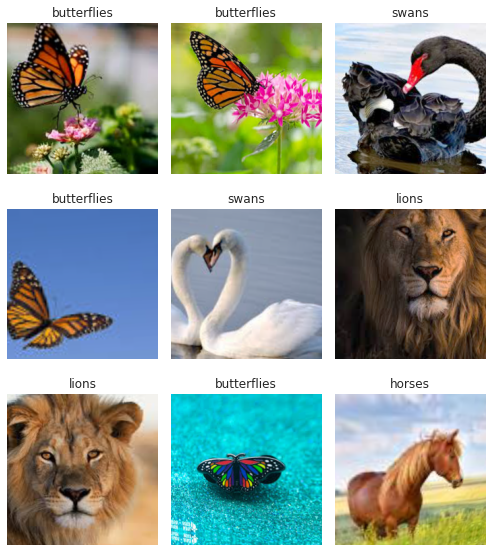

In [7]:
data.show_batch(rows=3, figsize=(7, 8))

In [11]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir="/tmp/model/")
# The created model uses the resnet34 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

In [12]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.305021,0.205798,0.072727,00:39
1,1.182953,0.038789,0.018182,00:38
2,0.784713,0.029563,0.000000,00:37


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


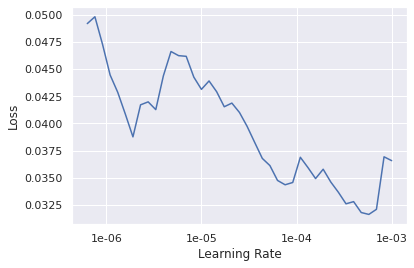

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.063225,0.028888,0.000000,00:54
1,0.061723,0.028561,0.018182,00:54
2,0.045902,0.025654,0.000000,00:54
3,0.040814,0.023753,0.000000,00:54


## Interpretation

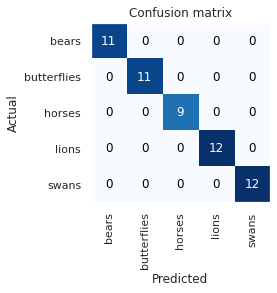

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

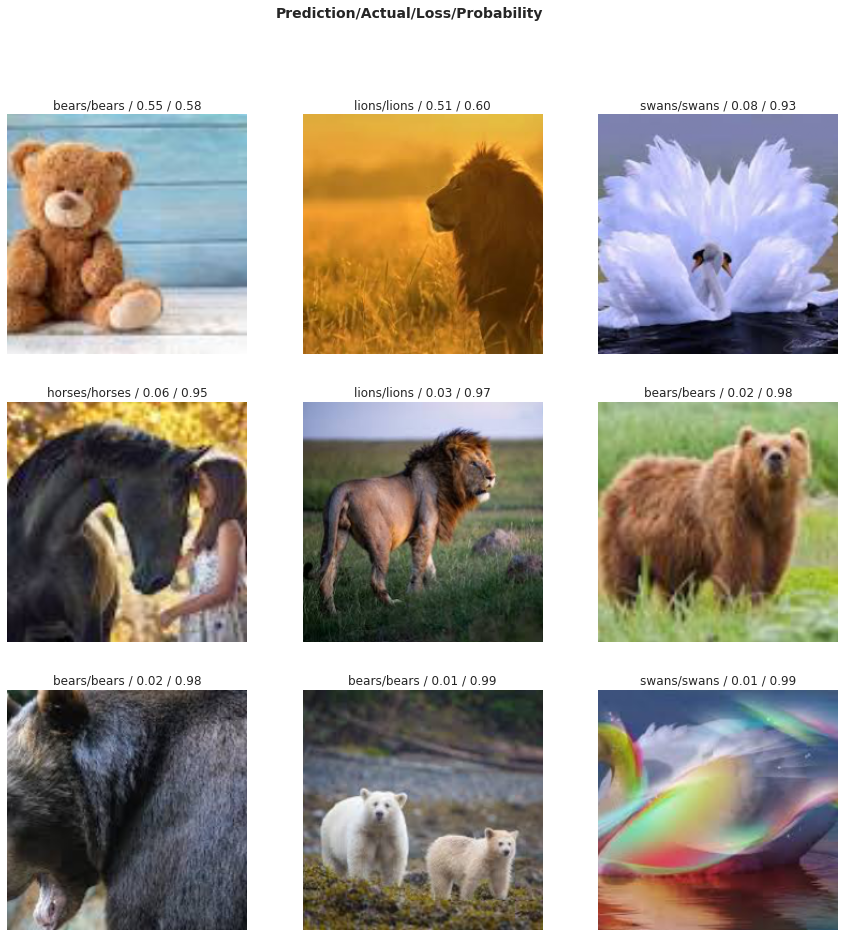

In [16]:
interp.plot_top_losses(9, figsize=(15,15))

In [ ]:
learn.summary()